<a href="https://colab.research.google.com/github/rbdus0715/Machine-Learning/blob/main/competitions/Predict-CO2-Emissions-in-Rwanda/%EA%B5%B0%EC%A7%91%ED%99%94%EB%A1%9C_%EC%97%85%EA%B7%B8%EB%A0%88%EC%9D%B4%EB%93%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 생각해보자
- CO2 배출량은 사람의 행위와 연관되어있다.
- 한 가지 테크닉은 시계열 시각화를 통해 패턴을 관찰하는 방법으로 배출량을 분석하는 것이다.}
- 여기서는 대략 500개의 유니크한 지역들을 K-평균 군집화로 군집화할 것이다.


In [1]:
import pandas as pd

path = 'drive/MyDrive/'
train = pd.read_csv(path + 'train.csv')
test = pd.read_csv(path + 'test.csv')

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

def kmeans_clustering(df, cluster_num, max_iter=1000):
    # 표준화
    scaler = StandardScaler()
    df_std = pd.DataFrame(scaler.fit_transform(df), columns=df.columns, index=df.index)

    # K-평균 군집화
    km_model = KMeans(n_clusters=cluster_num, max_iter=max_iter, random_state=666)
    km_model.fit(df_std)

    cluster_df = pd.DataFrame(data=km_model.labels_, columns=['ClusterNo'], index=df.index)

    return cluster_df

In [5]:
emission_series = train.pivot_table(
    index=['year', 'week_no'],
    columns=['longitude', 'latitude'],
    values='emission'
)

# 정규화
emission_series = (emission_series - emission_series.min()) / (emission_series.max() - emission_series.min())
emission_series = emission_series.dropna(axis=1)
emission_series

longitude       28.228    28.249    28.297    28.306    28.311    28.353  \
latitude        -2.972    -2.451    -1.903    -2.794    -2.589    -2.447   
year week_no                                                               
2019 0        0.733708  0.830925  0.813391  0.830925  0.324295  0.830925   
     1        0.754184  0.824839  0.877999  0.824839  0.426328  0.824839   
     2        0.744222  0.785891  0.893758  0.785892  0.512901  0.785891   
     3        0.764801  0.803512  0.926404  0.803512  0.538294  0.803512   
     4        0.740787  0.775843  0.938527  0.775843  0.531764  0.775843   
...                ...       ...       ...       ...       ...       ...   
2021 48       0.594657  0.508997  0.726488  0.508997  0.812097  0.508997   
     49       0.588665  0.508367  0.717296  0.508367  0.790073  0.508367   
     50       0.599439  0.537965  0.738872  0.537965  0.737149  0.537965   
     51       0.593237  0.540394  0.689163  0.540394  0.704344  0.540394   
     52       0.551775  0.525252  0.668031  0.525252  0.587004  0.525251   

longitude       28.364    28.380    28.398    28.404  ...    31.396    31.397  \
latitude        -1.536    -2.820    -1.902    -2.096  ...    -1.004    -1.203   
year week_no                                          ...                       
2019 0        0.830925  0.570356  0.804066  0.830925  ...  0.095630  0.627200   
     1        0.824839  0.731038  0.806220  0.824839  ...  0.197720  0.780831   
     2        0.785892  0.839829  0.776130  0.785892  ...  0.286173  0.875940   
     3        0.803512  0.885724  0.794743  0.803512  ...  0.322192  0.921740   
     4        0.775843  0.937518  0.768099  0.775843  ...  0.322769  0.991346   
...                ...       ...       ...       ...  ...       ...       ...   
2021 48       0.508997  1.000000  0.537720  0.508997  ...  0.589493  0.929169   
     49       0.508367  0.975945  0.535420  0.508367  ...  0.577424  0.909607   
     50       0.537965  0.956925  0.559282  0.537965  ...  0.537083  0.912215   
     51       0.540394  0.854219  0.559036  0.540394  ...  0.540289  0.797527   
     52       0.525252  0.788787  0.535644  0.525252  ...  0.399385  0.773514   

longitude       31.405    31.436    31.442    31.450    31.466    31.494  \
latitude        -1.695    -1.764    -1.858    -0.950    -1.534    -0.806   
year week_no                                                               
2019 0        0.016672  0.091622  0.090923  0.044224  0.084858  0.817096   
     1        0.024106  0.176765  0.181130  0.091105  0.177545  0.811263   
     2        0.031160  0.251889  0.260370  0.131659  0.258257  0.771382   
     3        0.037336  0.289766  0.298466  0.147829  0.293302  0.790083   
     4        0.039759  0.295499  0.303177  0.147845  0.295396  0.761621   
...                ...       ...       ...       ...       ...       ...   
2021 48       0.169221  0.458953  0.489884  0.365577  0.533815  0.493416   
     49       0.170480  0.456758  0.485535  0.358695  0.525065  0.492901   
     50       0.168932  0.433636  0.458351  0.337388  0.491242  0.523529   
     51       0.179351  0.463720  0.483140  0.336050  0.502120  0.526910   
     52       0.155165  0.331431  0.346912  0.267158  0.369042  0.509559   

longitude       31.524    31.532  
latitude        -1.176    -1.068  
year week_no                      
2019 0        0.123605  0.640212  
     1        0.230185  0.788420  
     2        0.322229  0.878769  
     3        0.358087  0.924198  
     4        0.357521  0.989262  
...                ...       ...  
2021 48       0.639257  0.919064  
     49       0.625007  0.900247  
     50       0.580793  0.903747  
     51       0.578201  0.794815  
     52       0.434908  0.768359  

[159 rows x 482 columns]

<Axes: xlabel='year,week_no'>

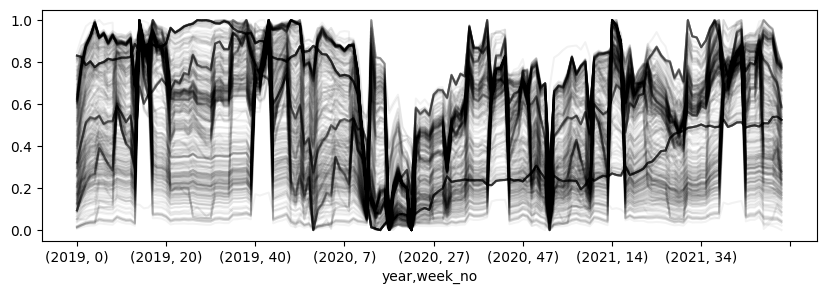

In [6]:
emission_series.plot(figsize=(10, 3), color='black', alpha=0.05, legend=False)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster No.: 0
Amount of meters: 61


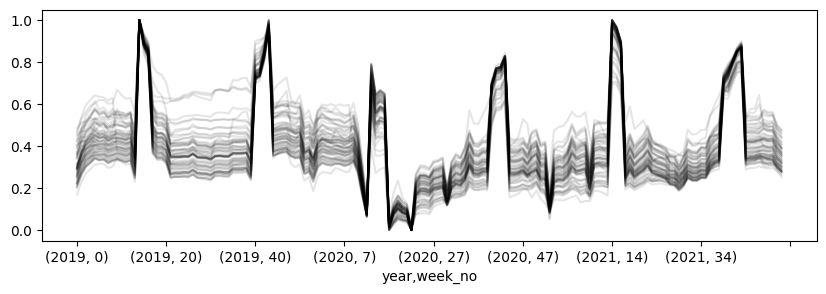

-----------------------------------------------------------------------------------
Cluster No.: 1
Amount of meters: 119


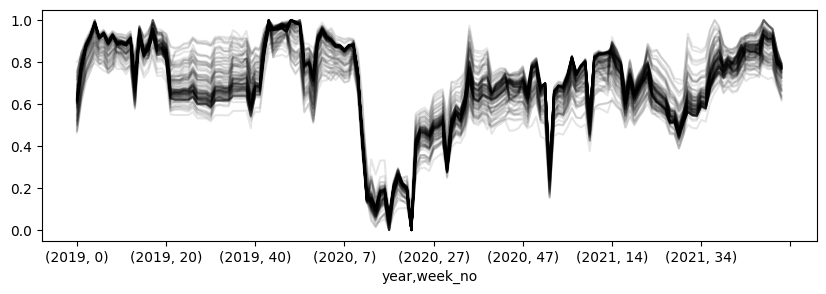

-----------------------------------------------------------------------------------
Cluster No.: 2
Amount of meters: 65


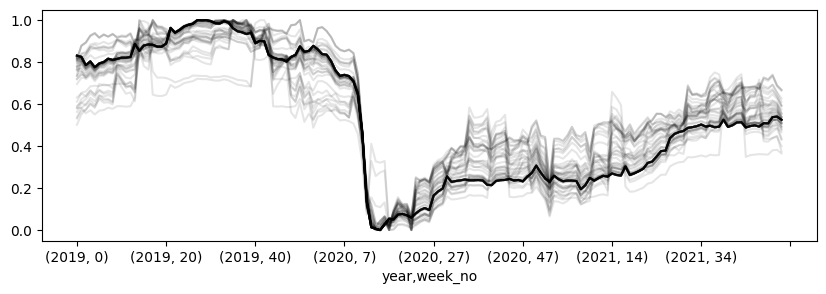

-----------------------------------------------------------------------------------
Cluster No.: 3
Amount of meters: 44


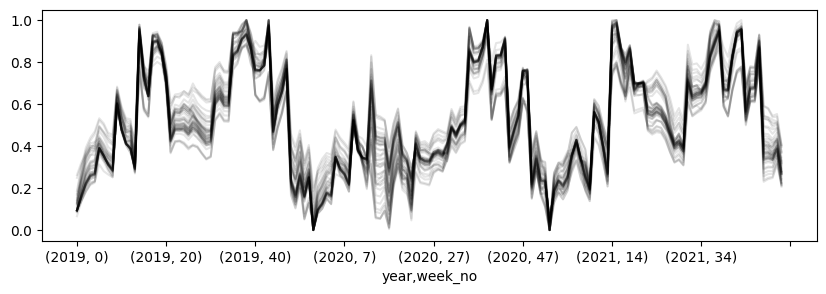

-----------------------------------------------------------------------------------
Cluster No.: 4
Amount of meters: 95


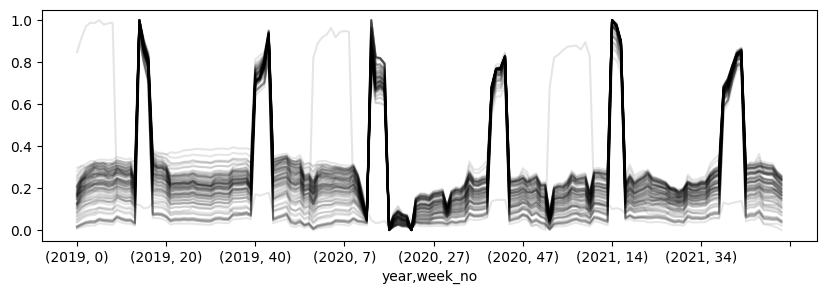

-----------------------------------------------------------------------------------
Cluster No.: 5
Amount of meters: 51


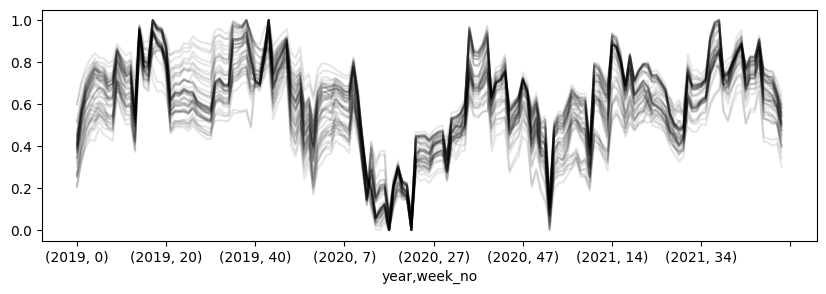

-----------------------------------------------------------------------------------
Cluster No.: 6
Amount of meters: 37


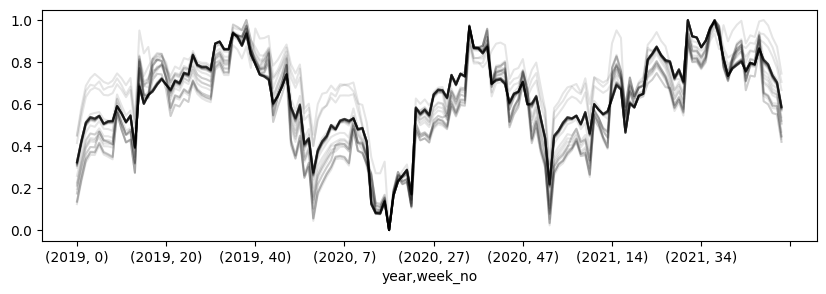

-----------------------------------------------------------------------------------
Cluster No.: 7
Amount of meters: 10


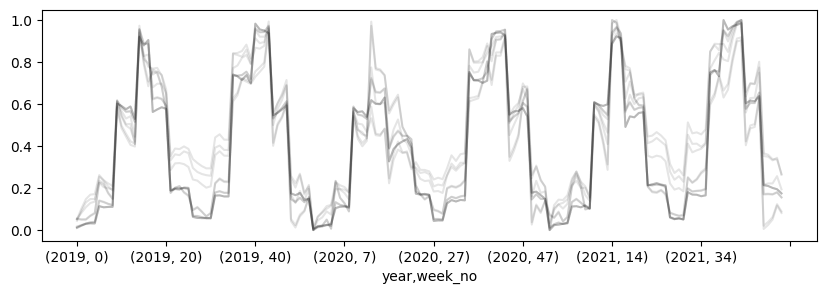

-----------------------------------------------------------------------------------


In [11]:
import matplotlib.pyplot as plt

df_cluster = emission_series.copy()

# index=위치정보, col=날짜
df_cluster = df_cluster.T

cluster_num = 8

df_cluster['ClusterNo'] = kmeans_clustering(df=df_cluster, cluster_num=cluster_num, max_iter=10000)

for ClusterNo in df_cluster['ClusterNo'].sort_values().unique():
    df_plot = df_cluster[df_cluster['ClusterNo']==ClusterNo].T.drop('ClusterNo')

    print('Cluster No.: ' + str(ClusterNo))
    print('Amount of meters: ' + str(len(df_plot.T)))
    df_plot.plot(figsize=(10,3),color='black',alpha=0.1,legend=False)
    plt.show()
    print('-----------------------------------------------------------------------------------')

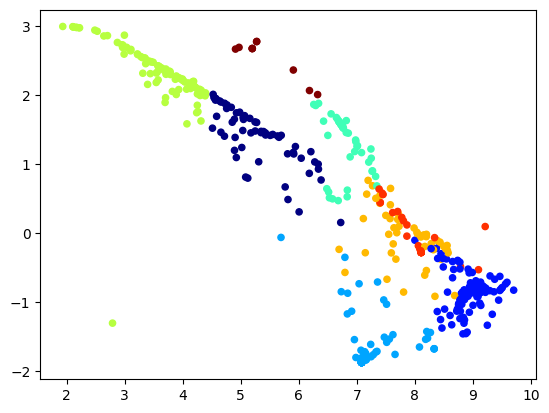

In [13]:
from sklearn.decomposition import TruncatedSVD

df_plot = df_cluster.drop('ClusterNo', axis=1)
tsvd = TruncatedSVD(n_components=2)
tsvd.fit(df_plot)
tsvd_results = tsvd.transform(df_plot)

plt.scatter(tsvd_results[:, 0], tsvd_results[:, 1], c=df_cluster['ClusterNo'], cmap='jet', s=20)

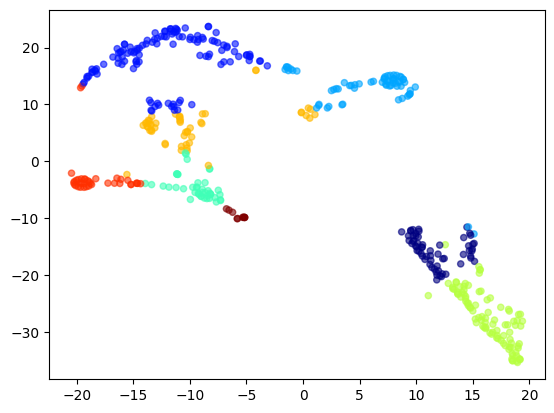

In [15]:
from sklearn.manifold import TSNE

df_plot = df_cluster.drop('ClusterNo',axis=1)
tsne = TSNE(n_components=2, perplexity=30, learning_rate=200)
tsne_results = tsne.fit_transform(df_plot)

plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=df_cluster['ClusterNo'], cmap='jet', s=20, alpha=0.6)

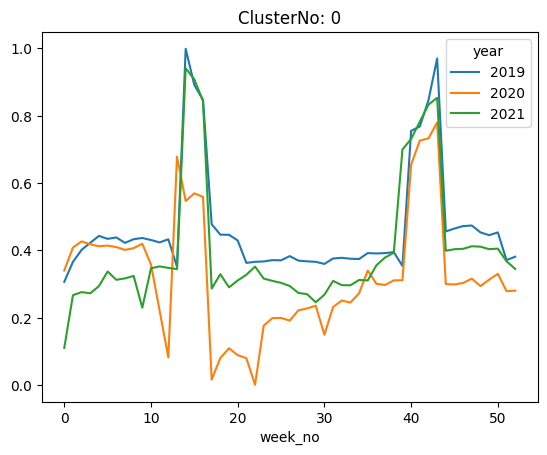

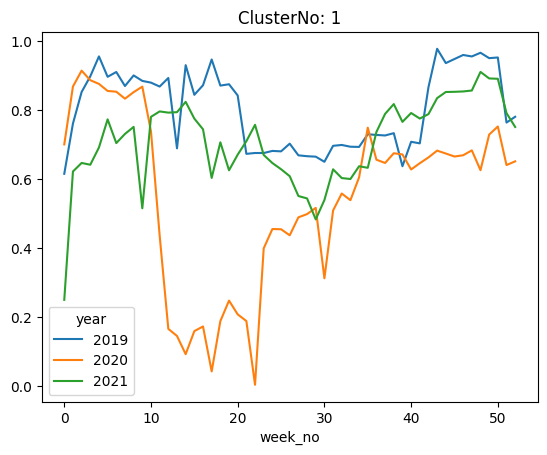

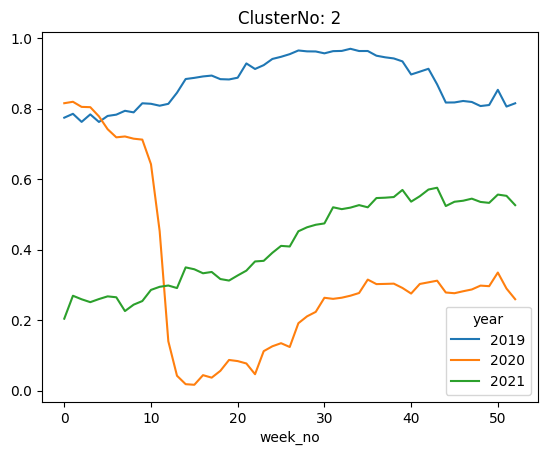

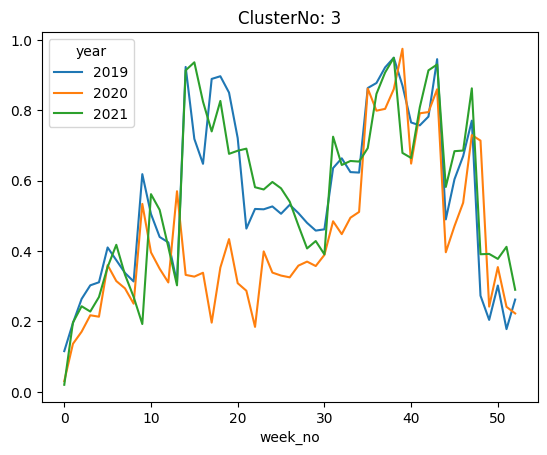

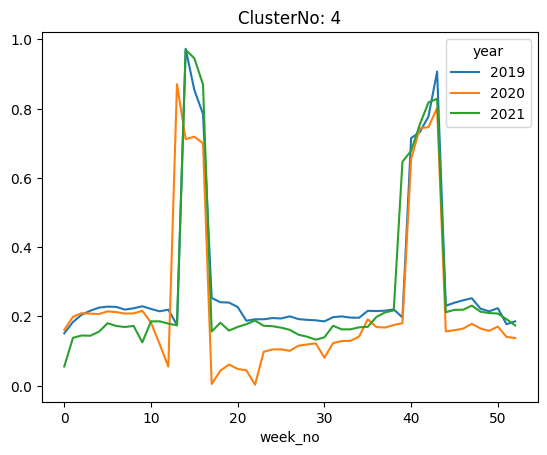

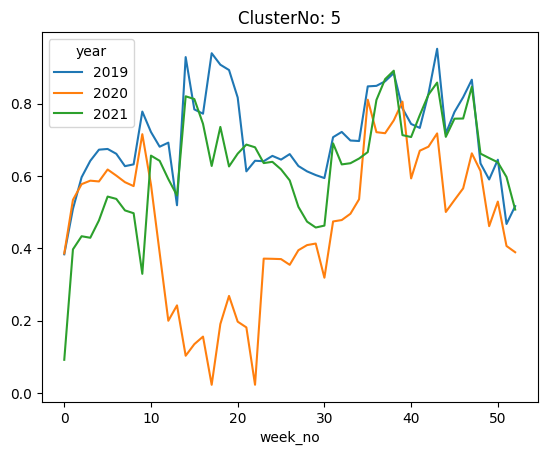

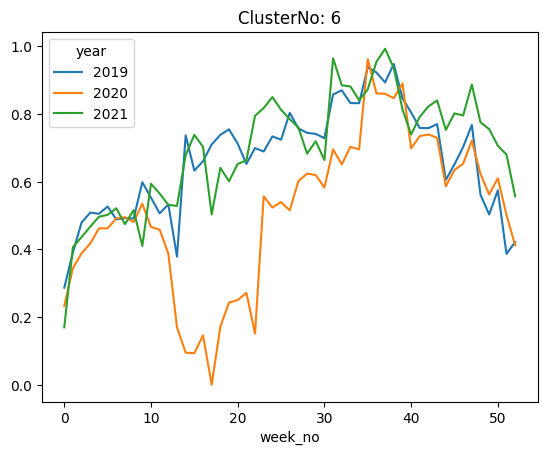

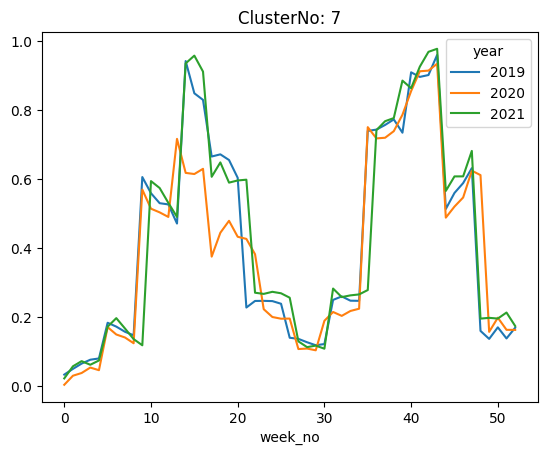

In [29]:
import seaborn as sns

for ClusterNo in df_cluster['ClusterNo'].sort_values().unique():
    df_plot = df_cluster[df_cluster['ClusterNo']==ClusterNo].T.drop('ClusterNo')

    df_plot = df_plot.mean(axis=1).reset_index()
    df_plot = df_plot.pivot_table(index='week_no',columns='year',values=0)
    df_plot.plot(title='ClusterNo: '+str(ClusterNo))

클러스터링 결과가 예측 작업에 어떤 도움이 될까?
- 95개를 포함하는 4번 군집을 예로 들면, 시계열에서 일관된 패턴을 쉽게 관찰할 수 있다.
- 특히 배출량이 많은 기간은 5월, 10월
- 계절별 배출량으로 볼 수 있음

<Axes: xlabel='year,week_no'>

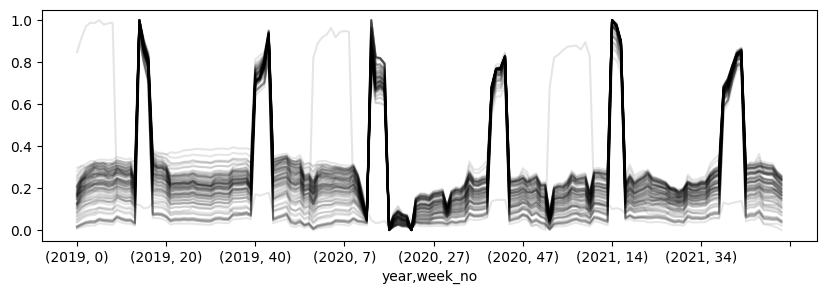

In [30]:
ClusterNo = 4
df_plot = df_cluster[df_cluster['ClusterNo']==ClusterNo].T.drop('ClusterNo')
df_plot.plot(figsize=(10,3),color='black',alpha=0.1,legend=False)

<Axes: xlabel='week_no'>

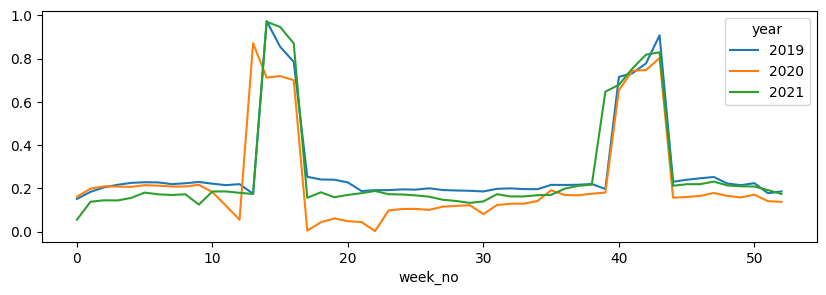

In [31]:
df_plot = df_plot.mean(axis=1).reset_index()
df_plot = df_plot.pivot_table(index='week_no',columns='year',values=0)
df_plot.plot(figsize=(10,3))

In [32]:
train_with_ClusterNo = train.merge(df_cluster['ClusterNo'].reset_index(),on=['longitude','latitude'],how='left').fillna(-1)
test_with_ClusterNo = test.merge(df_cluster['ClusterNo'].reset_index(),on=['longitude','latitude'],how='left').fillna(-1)

In [33]:
train_with_ClusterNo.to_csv('train_with_ClusterNo.csv', index=False)
test_with_ClusterNo.to_csv('test_with_ClusterNo.csv', index=False)

In [34]:
train_with_ClusterNo.groupby('ClusterNo')['emission'].describe()

,count,mean,std,min,25%,50%,75%,max
ClusterNo,,,,,,,,
-1.0,2385.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
0.0,9699.0,159.615953,93.533246,15.138647,96.588045,138.751590,204.811765,674.472000
1.0,18921.0,91.356322,109.113167,0.229436,19.241976,37.383343,144.997590,572.815060
2.0,10335.0,17.747947,29.568722,0.068790,1.080403,2.902540,21.654053,156.104630
3.0,6996.0,35.930859,27.379457,0.605553,10.419571,32.863991,50.283899,132.586760
4.0,15105.0,114.689591,156.676799,0.320641,54.860416,96.716520,137.309220,3167.768000
5.0,8109.0,73.241731,47.969692,5.125893,37.431206,61.074950,101.868164,261.088900
6.0,5883.0,74.077787,361.912303,0.003818,0.189667,1.937448,25.192033,2519.024400
7.0,1590.0,1.018679,1.104934,0.031470,0.192473,0.372687,2.035847,3.861705
